In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_dir = 'D:/Desktopshifted/MTech - PES university/Sem-3/CapstoneProject/Dataset/archive/COVID-19_Radiography_Dataset/SubData4/SubData4Output/train/'
test_data_dir = 'D:/Desktopshifted/MTech - PES university/Sem-3/CapstoneProject/Dataset/archive/COVID-19_Radiography_Dataset/SubData4/SubData4Output/test/'
val_data_dir = 'D:/Desktopshifted/MTech - PES university/Sem-3/CapstoneProject/Dataset/archive/COVID-19_Radiography_Dataset/SubData4/SubData4Output/val/'

In [3]:
input_shape = (224,224,3)
input_layer = Input(shape = (224, 224, 3))

In [4]:
img_width , img_height = [224,224]
batch_size = 16

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode = 'nearest'
        )
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_set = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = True)

Found 3702 images belonging to 4 classes.


In [8]:
test_set = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
       )

Found 794 images belonging to 4 classes.


In [9]:
val_set = val_datagen.flow_from_directory(
        val_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
       )

Found 796 images belonging to 4 classes.


In [10]:
train_y=train_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [15]:
from tensorflow.keras.models import load_model

In [16]:
VGG16_class_weights_balanced_model = load_model('vgg16_last4layertrainble_model_class_opt3_imbalance_class_weights.h5')

In [17]:
VGG16_class_weights_balanced_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
from keras.optimizers import SGD

In [19]:
opt = SGD(learning_rate=1e-6, momentum=0.9)

In [21]:
VGG16_class_weights_balanced_model.compile(optimizer=opt, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [22]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint

In [23]:
EarlyStopping = EarlyStopping(monitor='val_accuracy',
                              min_delta=.01,
                              patience=6,
                              verbose=1,
                              mode='auto',
                              baseline=None,
                              restore_best_weights=True)

In [24]:
rlr = ReduceLROnPlateau( monitor='val_accuracy',
                            factor=0.01,
                            patience=6,
                            verbose=0,
                            mode='max',
                            min_delta=0.01)

In [25]:
model_save = ModelCheckpoint('./vgg16_last4layertrainble_model_SGD.h5',
                             save_best_only = True,
                             save_weights_only = False,
                             monitor = 'val_loss', 
                             mode = 'min', verbose = 1)

In [26]:
nb_train_samples = 3702 # number of training-samples
nb_test_samples = 794 # number of test-samples
nb_validation_samples = 796 # number of validation-samples
epochs = 10  
batch_size  = 16

In [27]:
model_history = VGG16_class_weights_balanced_model.fit(train_set,steps_per_epoch = nb_train_samples // batch_size,epochs = epochs,validation_data = test_set,callbacks=[EarlyStopping, model_save,rlr])

Epoch 1/10
231/231 [==============================] - ETA: 0s - loss: 0.4150 - accuracy: 0.8437
Epoch 1: val_loss improved from inf to 0.37291, saving model to .\vgg16_last4layertrainble_model_SGD.h5
231/231 [==============================] - 873s 4s/step - loss: 0.4150 - accuracy: 0.8437 - val_loss: 0.3729 - val_accuracy: 0.8615 - lr: 1.0000e-06
Epoch 2/10
231/231 [==============================] - ETA: 0s - loss: 0.4153 - accuracy: 0.8394
Epoch 2: val_loss improved from 0.37291 to 0.29062, saving model to .\vgg16_last4layertrainble_model_SGD.h5
231/231 [==============================] - 847s 4s/step - loss: 0.4153 - accuracy: 0.8394 - val_loss: 0.2906 - val_accuracy: 0.8829 - lr: 1.0000e-06
Epoch 3/10
231/231 [==============================] - ETA: 0s - loss: 0.4140 - accuracy: 0.8351
Epoch 3: val_loss improved from 0.29062 to 0.24470, saving model to .\vgg16_last4layertrainble_model_SGD.h5
231/231 [==============================] - 851s 4s/step - loss: 0.4140 - accuracy: 0.8351 - va

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

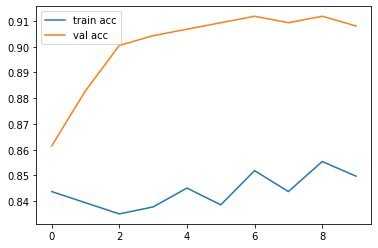

In [28]:
# accuracies
plt.plot(model_history.history['accuracy'], label='train acc')
plt.plot(model_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('Vgg16-acc-rps-3.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

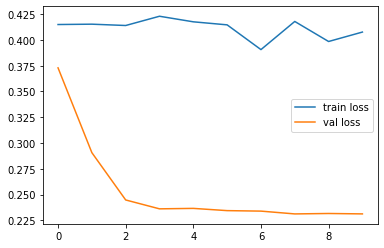

In [29]:
# loss
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('Vgg16-loss-rps-3.png')
plt.show()

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
import tqdm
val_set.reset()
X_val, y_val = next(val_set)
for i in tqdm.tqdm(range(int(val_set.n/batch_size)-1)): 
    img, label = next(val_set)
    X_val = np.append(X_val, img, axis=0 )
    y_val = np.append(y_val, label, axis=0)
print(X_val.shape, y_val.shape)

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:21<00:00,  2.19it/s]

(784, 224, 224, 3) (784, 4)


In [33]:
score = VGG16_class_weights_balanced_model.evaluate(X_val, y_val, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.2951786518096924
Test accuracy:  0.8928571343421936


In [35]:
#predict
y_pred=VGG16_class_weights_balanced_model.predict(X_val)
y_pred_classes=np.argmax(y_pred,axis=1)

25/25 [==============================] - 182s 7s/step


In [36]:
y_pred_classes = tf.keras.utils.to_categorical(y_pred_classes, num_classes=4)

<IPython.core.display.Javascript object>

In [37]:
y_pred_classes

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [38]:
#get classification report
print(classification_report(y_pred_classes,y_val))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       128
           1       0.86      0.82      0.84       235
           2       0.89      0.91      0.90       372
           3       1.00      0.98      0.99        49

   micro avg       0.89      0.89      0.89       784
   macro avg       0.91      0.91      0.91       784
weighted avg       0.89      0.89      0.89       784
 samples avg       0.89      0.89      0.89       784

